Engagement_Level
Operational      1.222812
Other            1.020147
Participatory    1.150943
Passive          1.171875
Name: internet_radicalization, dtype: float64


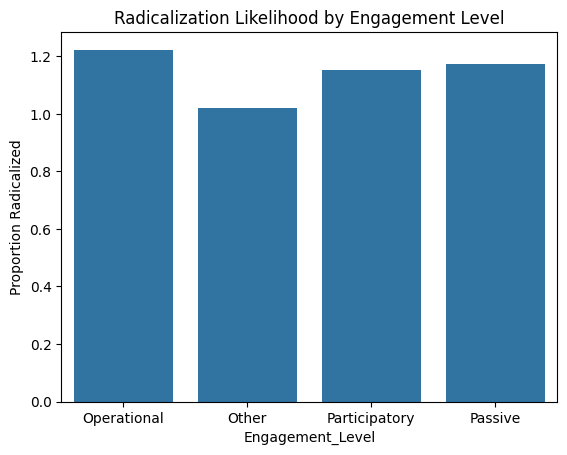

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('../data/pirus_clean.csv')

# Function to classify engagement level
def engagement_level(x):
    if x == 1:
        return 'Passive'
    elif 2 <= x <= 4:
        return 'Participatory'
    elif 5 <= x <= 7:
        return 'Operational'
    else:
        return 'Other'

# Columns that represent social media activities
activity_cols = [
    'social_media_activities1', 'social_media_activities2', 'social_media_activities3',
    'social_media_activities4', 'social_media_activities5', 'social_media_activities6',
    'social_media_activities7'
]

# Calculate total activity count per row
df['activity_count'] = df[activity_cols].sum(axis=1)

# Create Engagement_Level column using the function
df['Engagement_Level'] = df['activity_count'].apply(engagement_level)

# Group by Engagement_Level and calculate mean of internet_radicalization
radicalization_by_group = df.groupby('Engagement_Level')['internet_radicalization'].mean()
print(radicalization_by_group)

# Plot the results
sns.barplot(x=radicalization_by_group.index, y=radicalization_by_group.values)
plt.ylabel('Proportion Radicalized')
plt.title('Radicalization Likelihood by Engagement Level')
plt.show()